In [1]:
using Collide

In [2]:
using PyPlot, QHull, StaticArrays

In [18]:
p1 = rand(10, 3)
ch1 = chull(p1)
poly1 = ch1.points[ch1.vertices,:]' 

p2 = rand(10, 3) .+ [1.7 0.0 0.0]
ch2 = chull(p2)
poly2 = ch2.points[ch2.vertices,:]' 

res = Collide.gjk(poly1, poly2, SVector(0.0, 0.0, 1.0))

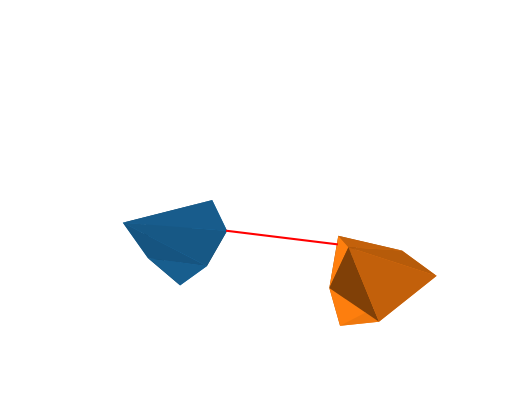

In [21]:
pygui(true)
clf()
plot_trisurf(p1[:, 1], p1[:, 2], p1[:, 3], triangles = ch1.simplices - 1)
plot_trisurf(p2[:, 1], p2[:, 2], p2[:, 3], triangles = ch2.simplices - 1)
# I couldn't get the scaling right for z-axis 
# with axis("equal"). Force setting the limits for now
axis("off")
xlim([0, 2])
ylim([0, 2])
zlim([0, 2])
res.status && res.collision || plot(res.contact[1, :], res.contact[2, :], res.contact[3, :], color=:red)
gcf()